# Análise das notas da prova de matemática do Enem 2024

Análise básica sobre as notas dos alunos que fizeram a prova no município de Campos dos Goytacazes na prova de matemática do Enem 2024 

## Passo 0: importando as dependências

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Passo 1: Preparando os dados para a análise

In [2]:
amostra = pd.read_csv('notas-campos.csv')
notas_mt = np.round(np.array(amostra["NU_NOTA_MT"], dtype=np.float32), decimals=0, out=None)
acertos_mt = np.round(np.array(amostra["ACERTOS_MT"], dtype=np.float32), decimals=0, out=None)
print(f"{len(amostra)} participantes fizeram a prova de matemática")


amostra

625 participantes fizeram a prova de matemática


,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,ACERTOS_MT,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC
0,372.6,500.1,425.4,518.4,3,13,12,5
1,373.3,389.9,534.3,552.4,3,9,21,11
2,374.8,411.7,391.3,482.4,5,8,10,9
3,375.3,380.2,440.7,413.0,6,8,10,11
4,376.1,476.5,377.5,382.2,3,11,8,8
...,...,...,...,...,...,...,...,...
620,804.6,685.6,739.3,665.2,35,31,41,13
621,830.7,742.7,581.8,582.0,37,36,27,13
622,855.0,702.2,657.9,651.7,40,33,35,14
623,864.7,721.6,702.0,637.1,39,35,39,9


## Passo 2 - Calculando medidas centrais

### Da nota

In [3]:
média_n = np.mean(notas_mt)
mediana_n = np.median(notas_mt)
moda_n = st.mode(notas_mt).mode
print("NOTA:", f"Média: {média_n}", f"Mediana: {mediana_n}", f"Moda: {moda_n}", sep="\n")

NOTA:
Média: 534.9487915039062
Mediana: 519.0
Moda: 646.0


### Dos acertos

In [4]:
média_a = np.mean(acertos_mt)
mediana_a = np.median(acertos_mt)
moda_a = st.mode(acertos_mt).mode
print("ACERTOS:", f"Média: {média_a}", f"Mediana: {mediana_a}", f"Moda: {moda_a}", sep="\n")

ACERTOS:
Média: 13.107199668884277
Mediana: 12.0
Moda: 9.0


## Passo 3 - Calculando medidas de dispersão

### Da nota

In [5]:
amplitude_n = notas_mt[-1] - notas_mt[0]
desvio_padrão_n = np.std(notas_mt)
cv_n = desvio_padrão_n / média_n
#pcc 

print("NOTA:", f"Amplitude: {amplitude_n}", f"Desvio padrão: {desvio_padrão_n}", f"Coeficiente de variação: {cv_n}", sep='\n')

NOTA:
Amplitude: 552.0
Desvio padrão: 112.1332015991211
Coeficiente de variação: 0.2096148282289505


### Dos acertos

In [6]:
amplitude_a = acertos_mt[-1] - acertos_mt[0]
desvio_padrão_a = np.std(acertos_mt)
cv_a = desvio_padrão_a / média_a
#pcc 

print("ACERTOS:", f"Amplitude: {amplitude_a}", f"Desvio padrão: {desvio_padrão_a}", f"Coeficiente de variação: {cv_a}", sep='\n')

ACERTOS:
Amplitude: 40.0
Desvio padrão: 6.4284138679504395
Coeficiente de variação: 0.49044907093048096


## Passo 4 - Calculando medidas de assimetria

### Da nota

In [7]:
assimetria_n = st.skew(notas_mt)
curtose_n = st.kurtosis(notas_mt)
pdf_n = st.norm.pdf(notas_mt, média_n, desvio_padrão_n)

print("NOTA:", f"Assimetria: {assimetria_n}", f"Curtose: {curtose_n}", sep='\n')

NOTA:
Assimetria: 0.4898703694343567
Curtose: -0.6683876514434814


### Dos acertos

In [8]:
assimetria_a = st.skew(acertos_mt)
curtose_a = st.kurtosis(acertos_mt)
pdf_a = st.norm.pdf(acertos_mt, média_a, desvio_padrão_a)
x = np.linspace(min(acertos_mt), max(acertos_mt), 500)
pdf_a = st.norm.pdf(x, média_a, desvio_padrão_a)

print("ACERTOS:", f"Assimetria: {assimetria_a}", f"Curtose: {curtose_a}", sep='\n')

ACERTOS:
Assimetria: 1.2489409446716309
Curtose: 1.877263069152832


## Passo 5 - Visualizando os dados

### Determinando número de classes por meio da regra de sturges

In [9]:
k = np.round(1 + np.log2(len(amostra)), decimals=0).astype(np.int32)

### Da nota

#### Histograma

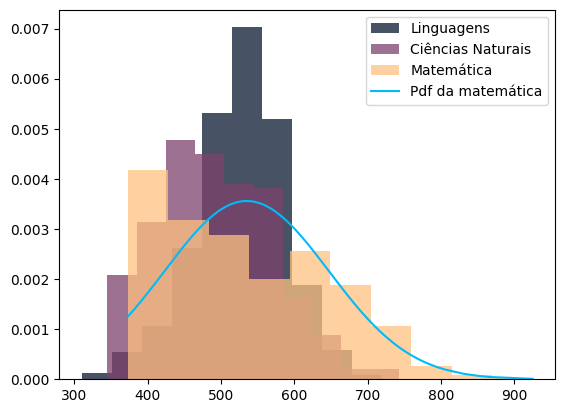

In [32]:
# pegando notas de outras categorias para comparação

# ciências naturais
notas_cn = [i for i in np.round(np.array(amostra["NU_NOTA_CN"], dtype=np.float32), decimals=0, out=None) if i != 0]

# linguagens
notas_lc = [i for i in np.round(np.array(amostra["NU_NOTA_LC"], dtype=np.float32), decimals=0, out=None ) if i != 0]

# ciências humanas
notas_ch = [i for i in np.round(np.array(amostra["NU_NOTA_CH"], dtype=np.float32), decimals=0, out=None ) if i != 0]

# Você pode comentar uma das linhas para ver o histograma de cada tipo mais claramente
hist_lc = plt.hist(notas_lc, bins=k, density=True, alpha=0.75, color='#091832', label="Linguagens")
qtd_lc, edge_lc = hist_lc[0], hist_lc[1]

hist_cn = plt.hist(notas_cn, bins=k, density=True, alpha=0.75, color='#7d426c', label="Ciências Naturais")
qtd_cn, edge_cn = hist_cn[0], hist_cn[1]

hist_mt = plt.hist(notas_mt, bins=k, density=True, alpha=0.75, color='#ffc281', label="Matemática")
qtd_mt, edge_mt = hist_mt[0], hist_mt[1]

plt.plot(notas_mt, pdf_n, color="#00BBF9", label="Pdf da matemática")
plt.legend()
plt.show()

#### Polígono de frequência

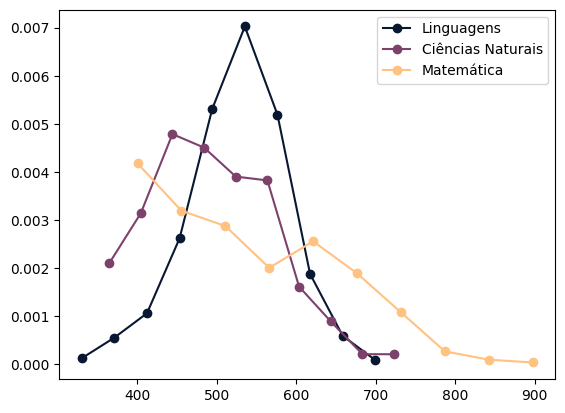

In [11]:
mid_mt = (edge_mt[:-1] + edge_mt[1:]) / 2
mid_lc = (edge_lc[:-1] + edge_lc[1:]) / 2
mid_cn = (edge_cn[:-1] + edge_cn[1:]) / 2

plt.plot(mid_lc, qtd_lc, marker='o', linestyle='-', color='#091832', label='Linguagens')
plt.plot(mid_cn, qtd_cn, marker='o', linestyle='-', color='#7d426c', label='Ciências Naturais')
plt.plot(mid_mt, qtd_mt, marker='o', linestyle='-', color='#ffc281', label='Matemática')

plt.legend()
plt.show()

#### Mapa de calor

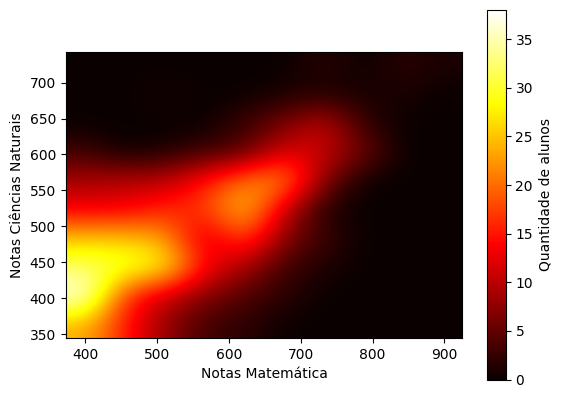

In [49]:
H, xedges, yedges = np.histogram2d(notas_mt, notas_cn, bins=k)

plt.imshow(H.T, origin='lower', cmap='hot', interpolation='bicubic',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel("Notas Matemática")
plt.ylabel("Notas Ciências Naturais")
plt.colorbar(label="Quantidade de alunos")
plt.show()


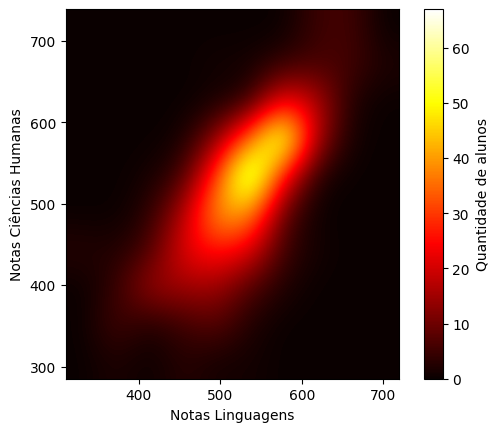

In [48]:
H, xedges, yedges = np.histogram2d(notas_lc, notas_ch, bins=k)

plt.imshow(H.T, origin='lower', cmap='hot', interpolation='bicubic',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel("Notas Linguagens")
plt.ylabel("Notas Ciências Humanas")
plt.colorbar(label="Quantidade de alunos")
plt.show()


### Dos acertos

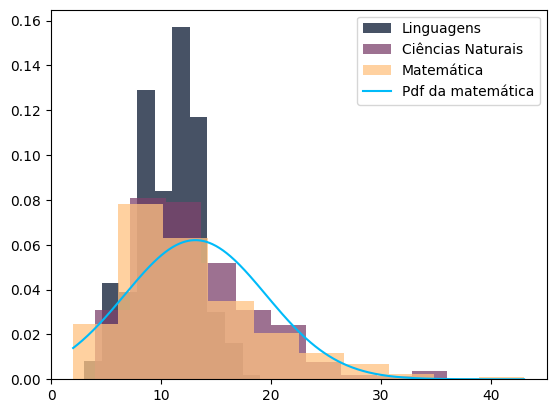

In [57]:
# pegando notas de outras categorias para comparação

# ciências naturais
acertos_cn = amostra["ACERTOS_CN"]

# linguagens
acertos_lc = amostra["ACERTOS_LC"]

# ciências humanas
acertos_ch = amostra["ACERTOS_CH"]

# Você pode comentar uma das linhas para ver o histograma de cada tipo mais claramente
hist_lc = plt.hist(acertos_lc, bins=k, density=True, alpha=0.75, color='#091832', label="Linguagens")
qtd_lc, edge_lc = hist_lc[0], hist_lc[1]

hist_cn = plt.hist(acertos_cn, bins=k, density=True, alpha=0.75, color='#7d426c', label="Ciências Naturais")
qtd_cn, edge_cn = hist_cn[0], hist_cn[1]

hist_mt = plt.hist(acertos_mt, bins=k, density=True, alpha=0.75, color='#ffc281', label="Matemática")
qtd_mt, edge_mt = hist_mt[0], hist_mt[1]

plt.plot(x, pdf_a, color="#00BBF9", label="Pdf da matemática")

plt.legend()
plt.show()

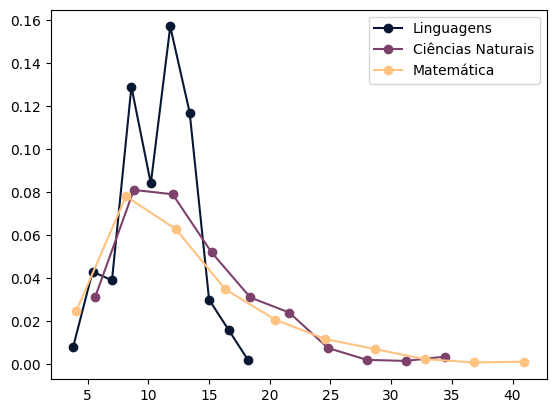

In [58]:
mid_mt = (edge_mt[:-1] + edge_mt[1:]) / 2
mid_lc = (edge_lc[:-1] + edge_lc[1:]) / 2
mid_cn = (edge_cn[:-1] + edge_cn[1:]) / 2

plt.plot(mid_lc, qtd_lc, marker='o', linestyle='-', color='#091832', label='Linguagens')
plt.plot(mid_cn, qtd_cn, marker='o', linestyle='-', color='#7d426c', label='Ciências Naturais')
plt.plot(mid_mt, qtd_mt, marker='o', linestyle='-', color='#ffc281', label='Matemática')

plt.legend()
plt.show()

#### Mapa de calor

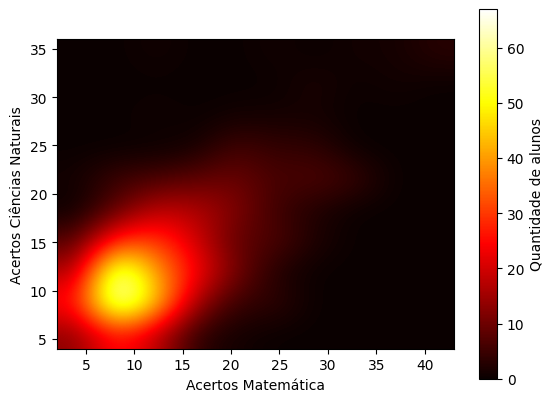

In [47]:
H, xedges, yedges = np.histogram2d(acertos_mt, acertos_cn, bins=k)

plt.imshow(H.T, origin='lower', cmap='hot', interpolation='bicubic',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel("Acertos Matemática")
plt.ylabel("Acertos Ciências Naturais")
plt.colorbar(label="Quantidade de alunos")
plt.show()


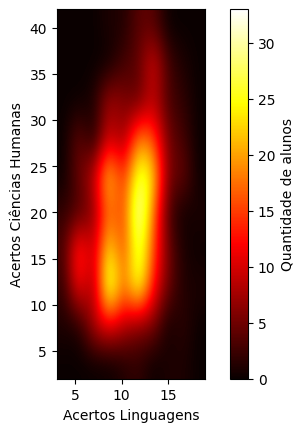

In [54]:
H, xedges, yedges = np.histogram2d(acertos_lc, acertos_ch, bins=k)

plt.imshow(H.T, origin='lower', cmap='hot', interpolation='bicubic',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel("Acertos Linguagens")
plt.ylabel("Acertos Ciências Humanas")
plt.colorbar(label="Quantidade de alunos")
plt.show()


## Referências
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem